In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Téléchargement des données 

## Données conso : 

Les données sont téléchargées sur : <br/>
https://www.rte-france.com/fr/eco2mix/eco2mix-telechargement

In [2]:
data = pd.read_excel("data.xlsx")
data.head()

,Mois,Qualité,Territoire,Production totale,Production nucléaire,Production thermique totale,Production thermique charbon,Production thermique fioul,Production thermique gaz,Production hydraulique,...,Production bio-énergies,Consommation totale,Solde exportateur,Echanges export,Echanges import,Echanges avec le Royaume-uni,Echanges avec l'Espagne,Echanges avec l'Italie,Echanges aves la Suisse,Echanges avec l'Allemagne et la Belgique
0,0000-00,Données consolidées,Grand-Est,7296,5505.0,864,153.0,8,701,537,...,70,3364,3876.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000-00,Données définitives,Nouvelle-Aquitaine,4523,3740.0,26,NaN,9,16,162,...,131,3222,1300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000-00,Données définitives,Auvergne-Rhône-Alpes,8890,5946.0,32,4.0,17,10,2632,...,79,5010,3658.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000-00,Données définitives,Bourgogne-Franche-Comté,152,NaN,19,0.0,0,19,19,...,20,1533,-1383.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0000-00,Données définitives,Bretagne,197,NaN,3,NaN,3,0,46,...,37,1493,-1300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Afin de coller avec les données DJU nous allons concentrer l'étude sur une région, et nous ne gardons que 
#Les données définitives.
conso = data.loc[data['Territoire'] == 'Auvergne-Rhône-Alpes']
conso = conso.loc[conso['Qualité'] == 'Données définitives']

#Les colonnes qui nous intéressent désormais sont la date et la conso : 
conso = conso[['Mois', 'Consommation totale']]

#Pas de données avant Janvier 2014, on enlève donc les mois précédents : 
conso = conso.loc[conso['Mois'] > "2013-12"]

#Les données DJU vont jusqu'au 05/2018 :
conso = conso.loc[conso['Mois'] < "2018-05"]

#On renomme les colonnes : 
conso = conso.rename(columns={'Mois':'date', 'Consommation totale':'consommation'})

#Split la colonne date en Année et Mois : 
#conso['annee'], conso['mois'] = conso['date'].str.split(pat='-').str
#conso = conso.drop(columns='date')

#On convertie ensuite la date en datetime :
from datetime import datetime
conso['date'] = pd.to_datetime(conso['date'], format='%Y-%m')
#Set index sur date : 
conso = conso.set_index('date')

conso.head()

,consommation
date,
2014-01-01,6693
2014-02-01,6013
2014-03-01,5965
2014-04-01,5139
2014-05-01,4858


## Données DJU

Données téléchargées sur : <br/>
https://cegibat.grdf.fr/simulateur/calcul-dju

In [4]:
dju = pd.read_excel('DJU.xlsx')

#On doit maintenant mettre en forme le Df, afin d'avoir une colonne année, une mois, une valeur :
dju = dju.stack()
dju = pd.DataFrame(dju)
dju = dju.reset_index()
dju = dju.rename(columns={"level_0":'annee', 'level_1':'mois', 0:'valeur'})

Il nous faut maintenant un index contenant la date complète; <br/>
On doit d'abord transformer le nom du mois en chiffre : 

In [5]:
def moisEnNum(shortMonth):
    m = {
            'Janvier' : 1,
            'Février' : 2,
            'Mars' : 3,
            'Avril' : 4,
            'Mai' : 5,
            'Juin' : 6,
            'Juillet' : 7,
            'Août' : 8,
            'Septembre' : 9, 
            'Octobre' : 10,
            'Novembre' : 11,
            'Décembre' : 12
    }
    resultats = []
    for i in shortMonth:
        out = m[i]
        resultats.append(out)    
    return resultats
    

dju['mois_num'] = moisEnNum(dju['mois'])

#On transforme ensuite cette colonne en date, ainsi que la colonne année : 
dju['date'] = dju['mois_num'].map(str) + '/' +  dju['annee'].map(str)
dju['date'] = pd.to_datetime(dju['date'], format='%m/%Y')

#On enlève les valeurs après Mai 2018 : 
dju = dju.loc[dju.date < '2018/05/01']

#On set l'index sur date: 
dju = dju.set_index('date')

#On ne garde que la colonne valeur : 
dju = dju[['valeur']]
dju.head()

,valeur
date,
2014-01-01,333.3
2014-02-01,294.7
2014-03-01,278.5
2014-04-01,184.0
2014-05-01,121.4


## Visualisation :

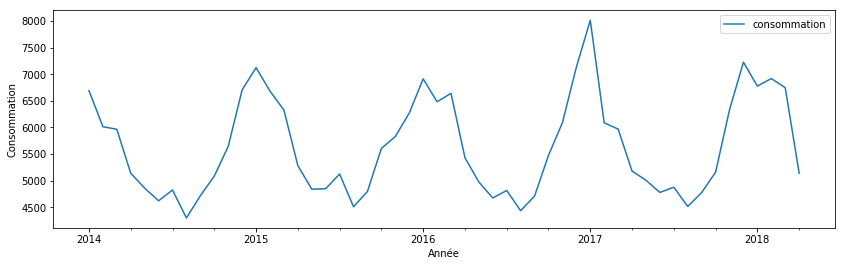

In [6]:
conso.plot(y='consommation', figsize=[14,4])
plt.xlabel('Année')
plt.ylabel('Consommation')
#plt.savefig("Graphiques/")
plt.show()

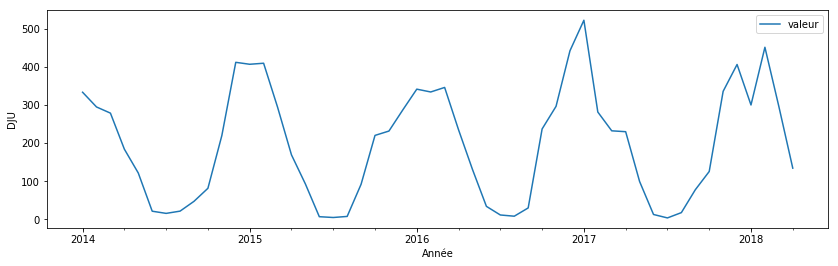

In [7]:
dju.plot(y='valeur', figsize=[14,4])
plt.xlabel('Année')
plt.ylabel('DJU')
#plt.savefig("Graphiques/")
plt.show()

# Mission 1 : Corrigez les données de consommation mensuelles de l'effet température (dues au chauffage électrique) en utilisant une régression linéaire.

In [8]:
all_data = pd.merge(conso, dju, left_index=True, right_index=True)

In [9]:
import statsmodels.formula.api as smf

reg_simp = smf.ols('consommation~valeur', data=all_data).fit()

In [10]:
print(reg_simp.summary())

                            OLS Regression Results                            
Dep. Variable:           consommation   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     526.5
Date:                Mon, 05 Aug 2019   Prob (F-statistic):           3.34e-28
Time:                        14:16:41   Log-Likelihood:                -364.83
No. Observations:                  52   AIC:                             733.7
Df Residuals:                      50   BIC:                             737.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4464.8367     63.700     70.092      0.0

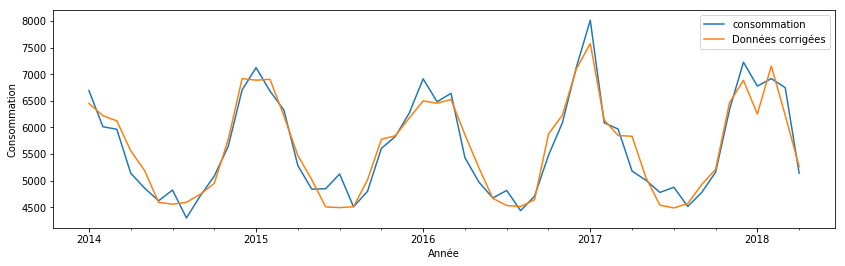

In [11]:
import seaborn as sns

all_data['pred'] = reg_simp.predict()

conso.plot(y='consommation', figsize=[14,4])
all_data['pred'].plot(label='Données corrigées')
plt.legend()
plt.xlabel('Année')
plt.ylabel('Consommation')
#plt.savefig("Graphiques/")
plt.show()

# Mission 2 : Effectuez une désaisonnalisation à l'aide des moyennes mobiles

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [13]:
x = pd.DataFrame(all_data['pred'], index = all_data.index)
x.head()

,pred
date,
2014-01-01,6450.207493
2014-02-01,6220.278563
2014-03-01,6123.779894
2014-04-01,5560.870987
2014-05-01,5187.981065


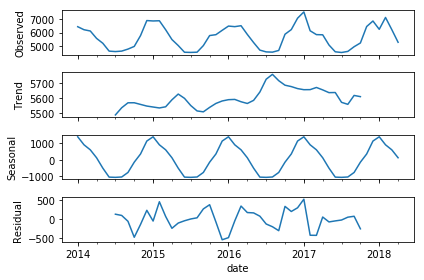

In [14]:
decomp_x = seasonal_decompose(x,  model='additive')
decomp_x.plot() #Plot en plus gros
plt.show()

Voir sur quel type de Moyenne mobile on est 

In [15]:
z = decomp_x.trend
z = pd.DataFrame(z, index=x.index)

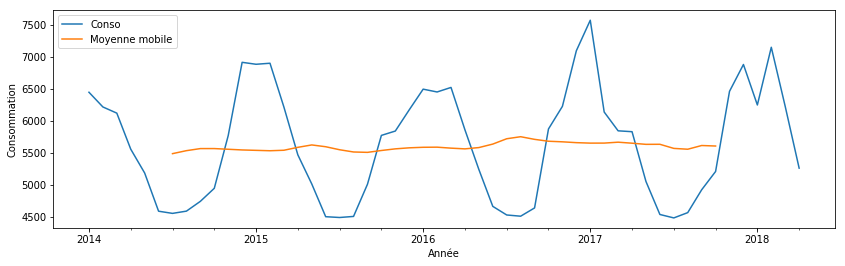

In [16]:
x['pred'].plot(figsize=(14,4), label='Conso')
z['pred'].plot(figsize=(14,4), label='Moyenne mobile')
plt.legend()
plt.xlabel('Année')
plt.ylabel('Consommation')
#plt.savefig("Graphiques/")
plt.show()

# Mission 3 : Effectuez une prévision de la consommation sur un an

On commence par prendre une échantillon de x : <br/>
on effectuera la prédiction sur Mai 2017 à Mai 2018, on enlève donc ces valeurs : 

In [17]:
y = x.loc[x.index <= '2017-05-01']
delta = x.loc[x.index > '2017-05-01']

## Méthode de Holt Winters : 

In [18]:
from statsmodels.tsa.api import ExponentialSmoothing

In [19]:
from statsmodels.tsa.statespace.sarimax import *

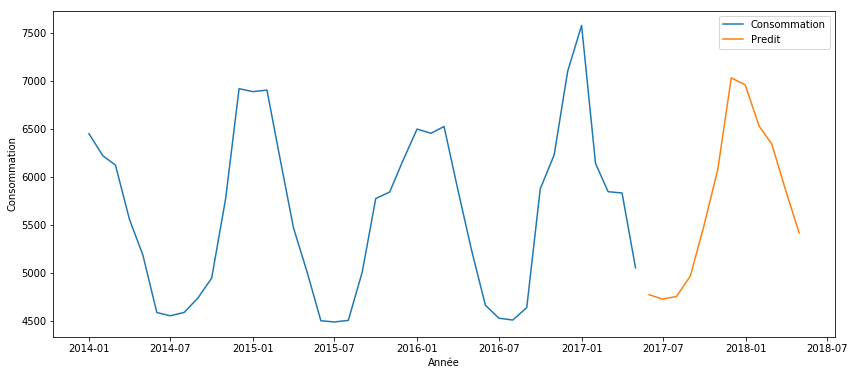

In [20]:
hw = ExponentialSmoothing(np.asarray(y['pred']), seasonal_periods=12, trend='add', seasonal='add').fit()
hw_pred = hw.forecast(12)

plt.figure(figsize=(14,6))
plt.plot(y['pred'], label='Consommation')
plt.plot(pd.date_range(y.index[len(y)-1], periods=12, freq='M'), hw_pred, label='Predit')
plt.legend()
plt.xlabel('Année')
plt.ylabel('Consommation')
#plt.savefig("Graphiques/")
plt.show()

Pas sûr pour l'interval de confiance, prendre le formule officielle et faire le calcul à la mano <br/>
https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-9-time-series-analysis-in-python-a270cb05e0b3 <br/>
http://villemin.gerard.free.fr/aMaths/Statisti/IntConf.htm

Regardons maintenant si la courbe pred ressemble bien à celle que l'on a pour 2018 : 

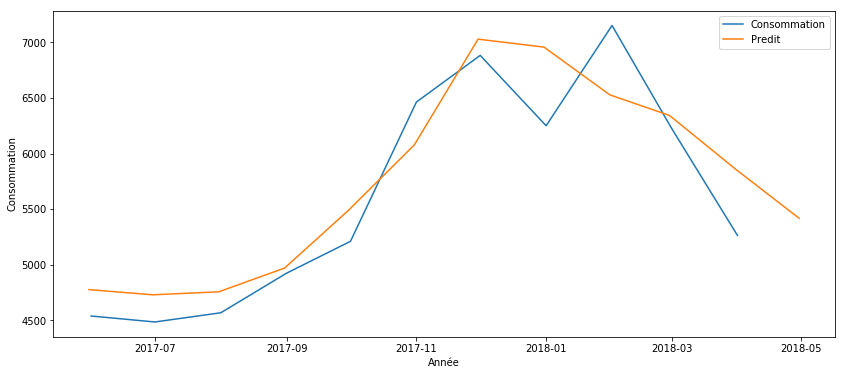

In [21]:
plt.figure(figsize=(14,6))
plt.plot(delta['pred'], label='Consommation')
plt.plot(pd.date_range(y.index[len(y)-1], periods=12, freq='M'), hw_pred, label='Predit')
plt.legend()
plt.xlabel('Année')
plt.ylabel('Consommation')
#plt.savefig("Graphiques/")
plt.show()

In [22]:
from sklearn.metrics import mean_squared_error
print('Holt-Winters model MSE:{}'.format(mean_squared_error(x['pred']['2017-05':],hw_pred)))

Holt-Winters model MSE:219399.28073815085


## Méthode SARIMA : 

### Stationnarisation de la série : 

In [23]:
from functions import plot_sortie_acf
from statsmodels.tsa.stattools import acf, pacf

In [24]:
z = z.dropna()

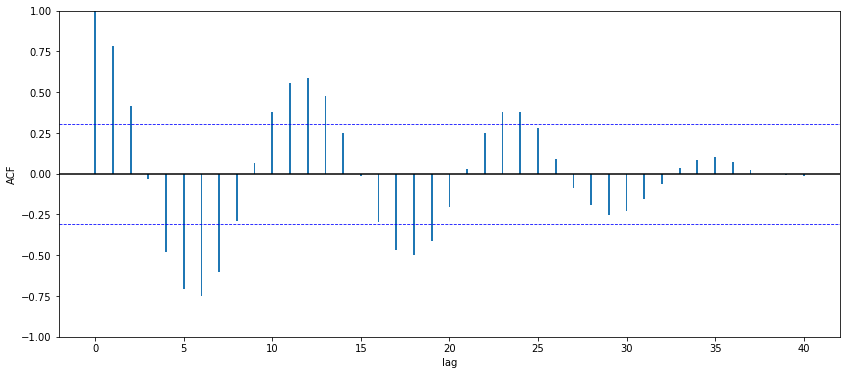

In [25]:
y_len = len(y['pred']) # variable nécessaire pour l'utilisation de plot_sortie_acf

plot_sortie_acf(acf(np.asarray(y['pred'])), y_len)

In [26]:
from pandas import Series
from statsmodels.tsa.stattools import adfuller
series = y['pred']
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.793415
p-value: 0.002975
Critical Values:
	1%: -3.661
	5%: -2.961
	10%: -2.619


Procédons tout d'abord à une différenciation : 

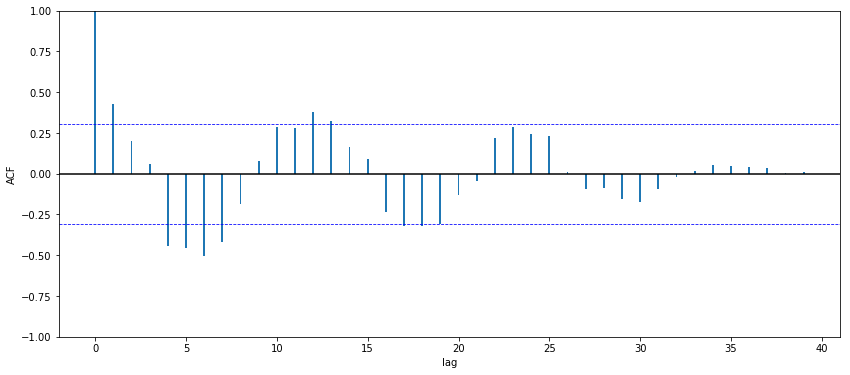

In [27]:
y_dif1 = y['pred'] - y['pred'].shift(1)

plot_sortie_acf(acf(np.asarray(y_dif1[1:])), y_len)

In [28]:
series = y_dif1[1:]
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.859594
p-value: 0.000042
Critical Values:
	1%: -3.679
	5%: -2.968
	10%: -2.623


On observe une décroissance lente vers 0 ; ce qui traduit un problème de non-stationnarité. On effectue donc une différenciation (𝐼−𝐵)

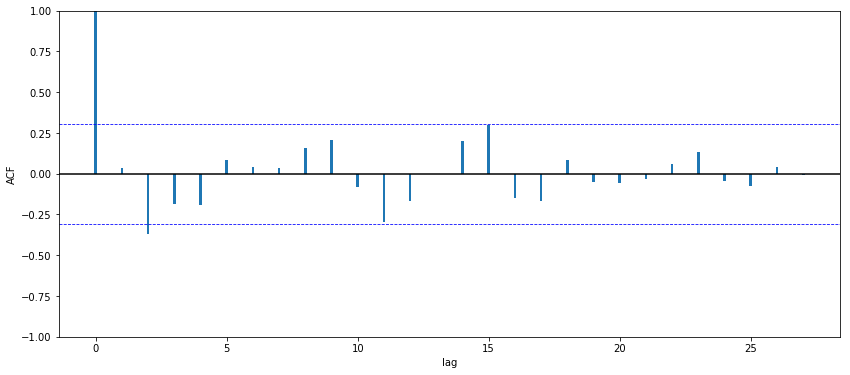

In [29]:
y_dif_1_12 = y_dif1 - y_dif1.shift(12)

plot_sortie_acf(acf(np.asarray(y_dif_1_12[13:])), y_len)

Test de dickey fuller à faire pour vérifier

In [30]:
series = y_dif_1_12[13:]
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.431316
p-value: 0.567174
Critical Values:
	1%: -3.833
	5%: -3.031
	10%: -2.656


Le processus n'est pas stationnaire

### Identification, estimation et validation de modèles

On s’appuie sur les autocorrélogrammes simple et partiels estimés :

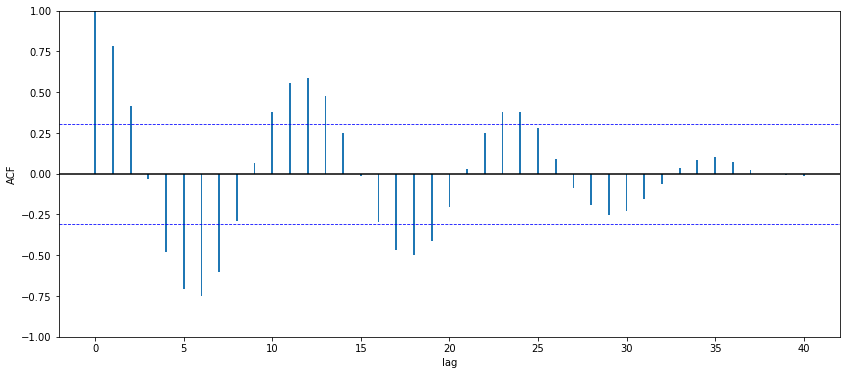

In [31]:
plot_sortie_acf(acf(np.asarray(y['pred'])), y_len)

C:\Users\jpaul\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


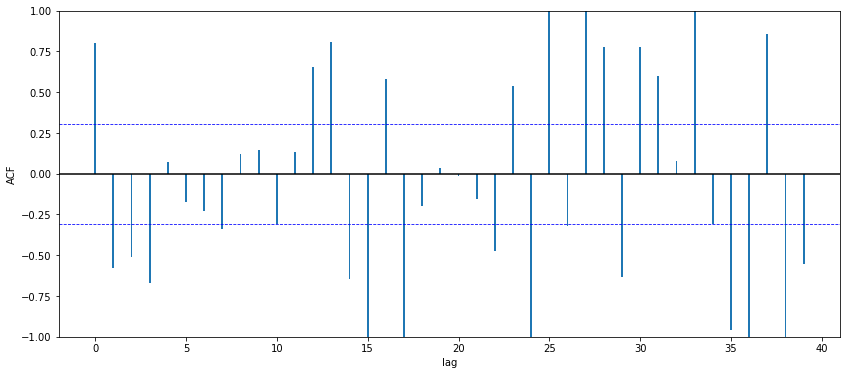

In [32]:
plot_sortie_acf(pacf(np.asarray(y['pred'])), y_len, pacf=True)

Wtf ?

L'autocorrélogramme partiel fait n'importe quoi là par contre

In [33]:
from statsmodels.tsa.statespace.sarimax import *
from statsmodels.stats.diagnostic import acorr_ljungbox

In [34]:
model1 = SARIMAX(np.asarray(y['pred']), order=(1,0,0), seasonal_order=(0,1,0,12))
results1 = model1.fit()
print(results1.summary())

print('Retard : p-value')
for elt in [6, 12, 18, 24, 30, 36]:
    print('{} : {}'.format(elt, acorr_ljungbox(results1.resid, lags=elt)[1].mean()))

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                   41
Model:             SARIMAX(1, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -214.161
Date:                            Mon, 05 Aug 2019   AIC                            432.322
Time:                                    14:16:47   BIC                            435.057
Sample:                                         0   HQIC                           433.179
                                             - 41                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3877      0.123      3.148      0.002       0.146       0.629
sigma2      1.487e+05   4.13e+04   

In [35]:
from scipy.stats import shapiro

shapiro(results1.resid)

(0.7457011342048645, 4.698240729794634e-07)

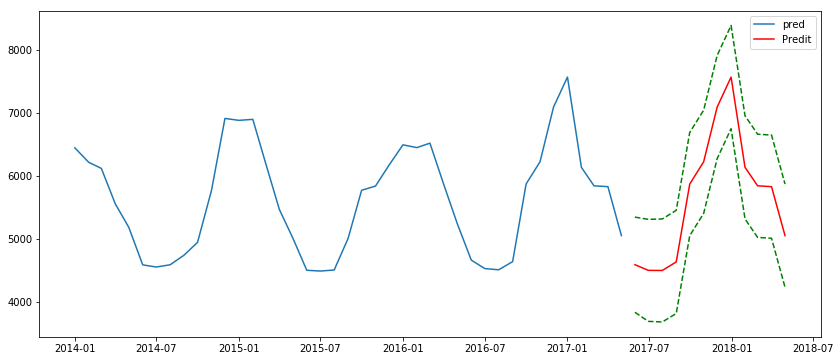

In [36]:
pred_model3 = results1.get_forecast(12)
pred = pred_model3.predicted_mean
pred_l = [elt[0] for elt in pred_model3.conf_int(alpha=0.05)]
pred_u = [elt[1] for elt in pred_model3.conf_int(alpha=0.05)]

plt.figure(figsize=(14,6))
plt.plot(y['pred'], label='pred')
plt.plot(pd.date_range(y.index[len(y)-1], periods=12, freq='M'), pred, color='r', label='Predit')
plt.plot(pd.date_range(y.index[len(y)-1], periods=12, freq='M'), pred_l, color='g', linestyle='--')
plt.plot(pd.date_range(y.index[len(y)-1], periods=12, freq='M'), pred_u, color='g', linestyle='--')
plt.legend()
plt.show()

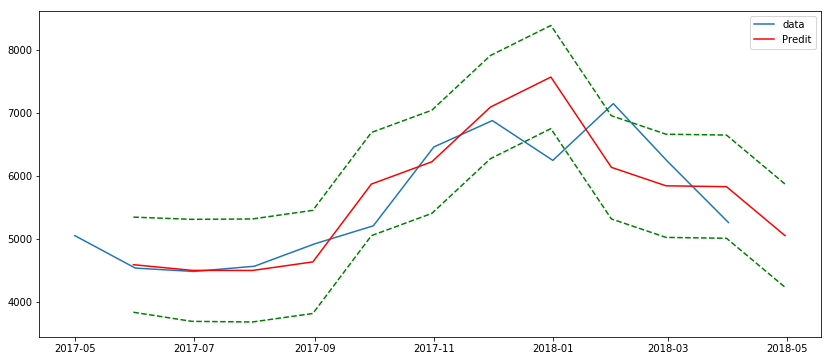

In [37]:
plt.figure(figsize=(14,6))
plt.plot(x['pred']['2017-05':], label='data')
plt.plot(pd.date_range(y.index[len(y)-1], periods=12, freq='M'), pred, color='r', label='Predit')
plt.plot(pd.date_range(y.index[len(y)-1], periods=12, freq='M'), pred_l, color='g', linestyle='--')
plt.plot(pd.date_range(y.index[len(y)-1], periods=12, freq='M'), pred_u, color='g', linestyle='--')
plt.legend()
plt.show()

In [38]:
from sklearn.metrics import mean_squared_error
print('SARIMAX model MSE:{}'.format(mean_squared_error(x['pred']['2017-05':],pred)))

SARIMAX model MSE:412604.31606224395


Le modèle fit mais pas satisfaisant, il est moins bon que le modèle Holt-Winters

## Utilisation d'une boucle pour chercher les meilleurs paramètres

In [49]:
import warnings
import itertools

In [51]:
warnings.filterwarnings("ignore")

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Exemples de combinaisons pour SARIMA...')
print('SARIMAX: {} x {}'.format(pdq[0], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Exemples de combinaisons pour SARIMA...
SARIMAX: (0, 0, 0) x (0, 0, 0, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


Garder la partie hors fonction, utile pour faire des modifs, l'enlever pour la soutenance

In [52]:
parametre = []
sea_parametre = []
aic_result = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y['pred'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            #print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            parametre.append(param)
            sea_parametre.append(param_seasonal)
            aic_result.append(results.aic)
        except:
            continue
parametre = pd.DataFrame(parametre ,columns=['p', 'd', 'q'])
sea_parametre = pd.DataFrame(sea_parametre ,columns=['s_p', 's_d', 's_q', 's'])         
aic_result = pd.DataFrame(aic_result ,columns=['AIC'])

result = pd.merge(parametre, sea_parametre, left_index=True, right_index=True)
result = pd.merge(result, aic_result, left_index=True, right_index=True)

#best_param = result.min(axis=0)
result = result[result['AIC'] >= 0]
best = result['AIC'].min()
best = result.loc[result['AIC'] == best]
best

,p,d,q,s_p,s_d,s_q,s,AIC
47,1,1,1,1,1,0,12,230.180671


In [53]:
def best_param (df_col, p_max, d_max, q_max):
    
    warnings.filterwarnings("ignore") #Ignore les messages d'erreurs

    #Set up des paramètres maximum vus sur les autocorrélogrammes :
    p = range(0, p_max+1)
    d = range(0, d_max+1)
    q = range(0, q_max+1)
    
    #On crée les listes nous permettant de faire la boucle d'après : 
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

    #Boucle qui récupère chacun des résultats AIC pour tous les paramètres :
    parametre = []
    sea_parametre = []
    aic_result = []
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(df_col,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=True,
                                                enforce_invertibility=True)
                results = mod.fit()
                parametre.append(param)
                sea_parametre.append(param_seasonal)
                aic_result.append(results.aic)
            except:
                continue
    
    #Mise en place du df avec les résultats : 
    parametre = pd.DataFrame(parametre ,columns=['p', 'd', 'q'])
    sea_parametre = pd.DataFrame(sea_parametre ,columns=['s_p', 's_d', 's_q', 's'])         
    aic_result = pd.DataFrame(aic_result ,columns=['AIC'])

    result = pd.merge(parametre, sea_parametre, left_index=True, right_index=True)
    result = pd.merge(result, aic_result, left_index=True, right_index=True)

    #On récupère la valeur minimal du AIC, qui est donc notre config optimale :
    result = result[result['AIC'] >= 0] #On ne garde que les AIC >= à 0
    best = result['AIC'].min()
    best = result.loc[result['AIC'] == best]
    
    return best

In [54]:
best_param(y['pred'], 4, 1, 3)

,p,d,q,s_p,s_d,s_q,s,AIC
130,4,1,1,1,1,0,12,420.772713


In [44]:
import statsmodels.api as sm

model2 = sm.tsa.statespace.SARIMAX(y['pred'],
                                   order=(4,1,1),
                                   seasonal_order=(1,1,0,12),
                                   enforce_stationarity=True,
                                   enforce_invertibility=True)
results2 = model2.fit()
print(results2.summary())

print('Retard : p-value')
for elt in [6, 12, 18, 24, 30, 36]:
    print('{} : {}'.format(elt, acorr_ljungbox(results2.resid, lags=elt)[1].mean()))

                                 Statespace Model Results                                 
Dep. Variable:                               pred   No. Observations:                   41
Model:             SARIMAX(4, 1, 1)x(1, 1, 0, 12)   Log Likelihood                -203.386
Date:                            Mon, 05 Aug 2019   AIC                            420.773
Time:                                    14:16:49   BIC                            430.098
Sample:                                01-01-2014   HQIC                           423.624
                                     - 05-01-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1914      0.355      0.538      0.590      -0.505       0.888
ar.L2         -0.3701      0.279   

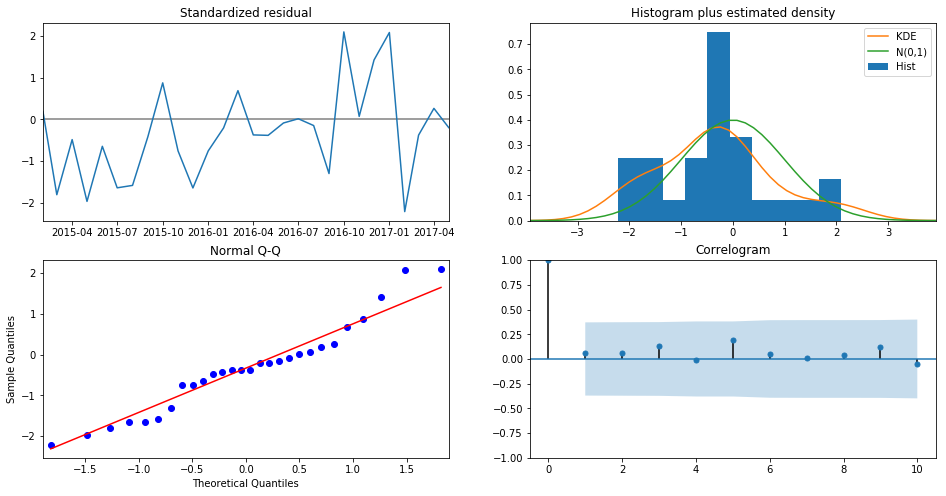

In [45]:
results2.plot_diagnostics(figsize=(16, 8))
plt.show()

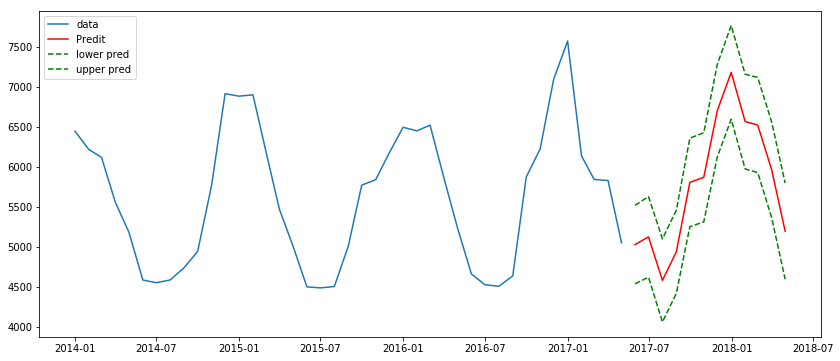

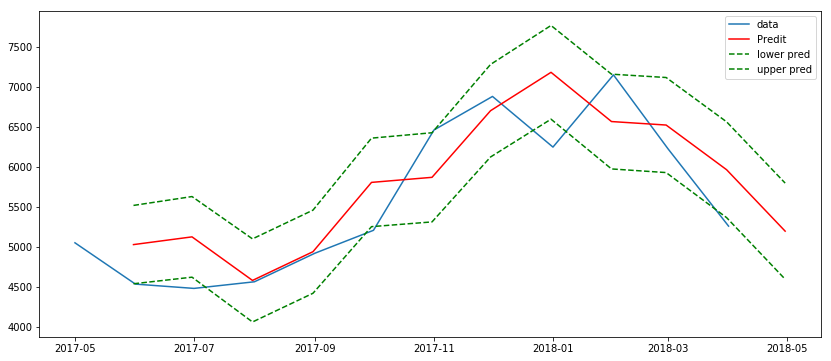

In [46]:
pred_model2 = results2.get_forecast(12)
pred2 = pred_model2.predicted_mean
pred_2 = pred_model2.conf_int(alpha=0.05)['lower pred']
pred_u2 = pred_model2.conf_int(alpha=0.05)['upper pred']

plt.figure(figsize=(14,6))
plt.plot(y['pred'], label='data')
plt.plot(pd.date_range(y.index[len(y)-1], periods=12, freq='M'), pred2, color='r', label='Predit')
plt.plot(pd.date_range(y.index[len(y)-1], periods=12, freq='M'), pred_2, color='g', linestyle='--')
plt.plot(pd.date_range(y.index[len(y)-1], periods=12, freq='M'), pred_u2, color='g', linestyle='--')
plt.legend()
plt.show()

plt.figure(figsize=(14,6))
plt.plot(x['pred']['2017-05':], label='data')
plt.plot(pd.date_range(y.index[len(y)-1], periods=12, freq='M'), pred2, color='r', label='Predit')
plt.plot(pd.date_range(y.index[len(y)-1], periods=12, freq='M'), pred_2, color='g', linestyle='--')
plt.plot(pd.date_range(y.index[len(y)-1], periods=12, freq='M'), pred_u2, color='g', linestyle='--')
plt.legend()
plt.show()

In [47]:
from sklearn.metrics import mean_squared_error
print('SARIMAX model MSE:{}'.format(mean_squared_error(x['pred']['2017-05':],pred2)))

SARIMAX model MSE:202875.93915820555


Le deuxième modèle est meilleur que le premier

https://www.datasciencecentral.com/profiles/blogs/tutorial-forecasting-with-seasonal-arima <br/>
https://www.seanabu.com/2016/03/22/time-series-seasonal-ARIMA-model-in-python/<br/>
https://machinelearningmastery.com/time-series-data-stationary-python/<br/>
https://machinelearningmastery.com/time-series-data-stationary-python/<br/>

https://www.kaggle.com/sumi25/understand-arima-and-tune-p-d-q<br/>
https://www.kaggle.com/poiupoiu/how-to-use-sarimax <br/>

https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3 <br/>
https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b